# Traffic Incidents for 30mph Roads in the UK for January-June 2024

This document provides an analysis of traffic incidents in the UK for a period starting January to June 2024 for roads where speed limit is 30mph. Given that the author spends considerable periods of her driving in 30mph limited roads due to school run, she curiosly wanted to learn more on road safety specifically traffic incidents.

This report,in terms of incidents,works to address or highlight the following;
    1) The traffic incident ratios in 30mph roads compared to the rest
    2) The severity pattern of these incidents
    3) Whether elements such as weather and light variations negatively impact road safety.
    4) Understand if there are hotspots and and other causes.

The methodology that was followed is as such; Firstly,dataset for January to June 2024 was downloaded from GOV site [1]. Secondly,dataset was cleaning to account for missing data.Thirdly,an analysis on features of the datasets was analysed to determine relevant ones to the subject. In addition, relevant features were examined to address the objectives of the report.  

In [1]:
import pandas as  pd
import numpy as np
import seaborn.objects as so

In [2]:
# Parsing Dataset
df = pd.read_csv('road_safety_2024.csv')

/var/folders/nq/cqw4llyd09b88qmjkgyys35r0000gp/T/ipykernel_1498/2996480151.py:2: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('road_safety_2024.csv')


In [3]:
# Features List as  Columns
df.columns

In [4]:
#A small Dataset Caption
df.head()

In [5]:
# Statistical Summary
df.describe()

In [6]:
# Dataset infomation summary
df.info()

In [7]:
# Removing Columns Latitude and Longitude due to "NaN" values
df_new = df.drop(['longitude','latitude'],axis = 1)

In [8]:
df_new.info()

## Analysing the speed Limit Data
In this section, we work to understand the disctribution of the incidents with speed limit being the deciding factor

In [9]:
# Unique speed limits in dataset
df_new.speed_limit.unique()

array([30, 20, 50, 40, 60, 70, -1])

In [10]:
# Presence of invalid data(ie  speed_limit of -1)
df_new['speed_limit'].value_counts()

In [11]:
# Replaced invalid data
df_new['speed_limit'].replace(-1,70,inplace = True)

In [12]:
df_new['speed_limit'].value_counts()

<Axes: title={'center': 'Traffic Incidents per Speed Limit'}>

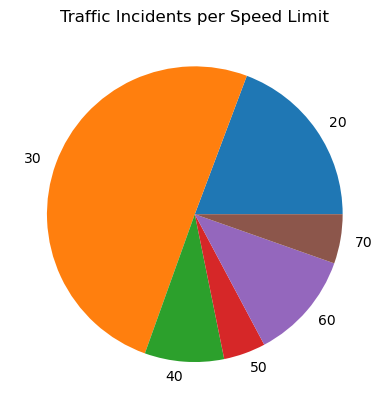

In [13]:
# Plot to show incidents according to which type of road the incident happened in terms of speed limit
df_new.groupby(['speed_limit']).size().plot(kind ='pie',title = 'Traffic Incidents per Speed Limit')

### Observation:
About 50% of incidents were on 30mph roads. More than 60% of incidents were on roads of 30mph or lower. It is an interesting observation.

## Month by Month Traffic Incidents
With considerable number of incidents at 30mph,we work to understand monthly pattern,with a view to determine if incidents are concentrated in some months or not.

In [14]:
# Data slicing for Date column to aid month data analysis
def splice(entry):
    return entry[3:5]

In [15]:
df_new['month']=df_new.date.apply(splice)

In [16]:
df_new['month'].unique()

array(['01', '02', '03', '04', '05', '06'], dtype=object)

In [17]:
#df_new.columns
def month_names(month):
    month_new =  ""
    match month:
        case '01':
            month_new  = "January"
        case '02':
            month_new   = 'February'
        case '03':
            month_new  = "March"
        case '04':
            month_new  = "April"
        case '05':
            month_new  = 'May'
        case '06':
            month_new  = 'June'
        case '07':
            month_new  = 'July'
        case '08':
            month_new  = "August"
        case '09':
            month_new   = 'September'
        case '10':
            month_new  = "October"
        case '11':
            month_new  = "November"
        case '12':
            month_new  = 'December'

    return month_new     

#month_names('09')

'September'

/Users/namusale/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


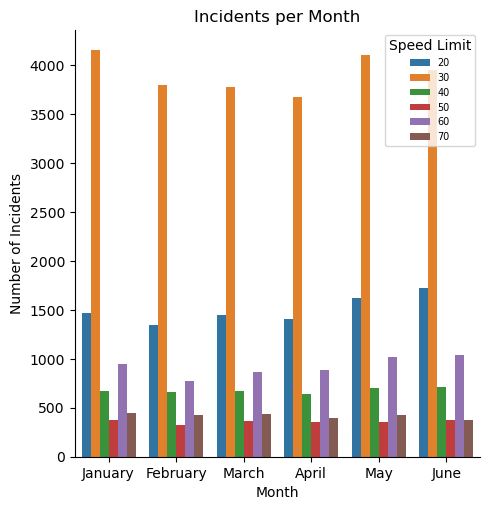

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

df_new['month_names']=df_new['month'].apply(month_names)
 
monthly = sns.catplot(data = df_new,x = 'month_names',kind = 'count' ,hue = 'speed_limit',legend=False)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Incidents per Month')
plt.legend(title = 'Speed Limit',loc='upper right',fontsize='7')
plt.show(monthly)

### Observation
The monthly incident plot shows 30mph roads have more accidents for all  six months under study. 

## Weather and Light Conditions on Road Incidences

With high volumes of incidences notes on 30mph roads across all months under study, we investigate if these incidences are more prevalent in certain days or times of the day.

In [19]:
# Day of Week function for naming
def day_names(day_number):
    new_day =  ""
    match day_number:
    
        case 1:
            new_day = "Sunday"
        case 2:
            new_day  = 'Monday'
        case 3:
            new_day = "Tuesday"
        case 4:
            new_day = "Wednesday"
        case 5:
            new_day = 'Thursday'
        case 6:
            new_day = 'Friday'
        case 7:
            new_day = 'Saturday'
            

    return new_day    

#day_names(7)

'Saturday'

In [20]:
df_new['Week_day']= df_new['day_of_week'].apply(day_names)

In [21]:
#Function for time periods in a day
def period(time):
    period =  ""
    
    if(time  >= 0 and time < 3):
        period = "0 - 2"
        
    elif(time  >= 3 and time < 6):
        period = "3 - 5"
        
    elif(time  >= 6 and time < 9):
        period = "6 - 8"
        
    elif(time  >= 9 and time < 12):
        period = "9 - 11"
        
    elif(time  >= 12 and time < 15):
        period = "12 - 14"
        
    elif(time  >= 15 and time < 18):
        period = "15 - 17"
        

    elif(time  >= 18 and time < 21):
        period = "18 - 20"  
        
    elif(time  >= 21 and time < 24):
        period = "21 - 00"
        
    else:
        period =""
   

    return period    

#period(23)

'21 - 00'

In [22]:
def splice(entry):
    return entry[0:2]

In [23]:
df_new['time_period']=df_new['time'].apply(splice).astype(int).apply(period)

In [24]:
df_new.groupby('time_period').size()

time_period
0 - 2       1597
12 - 14     8434
15 - 17    11726
18 - 20     7644
21 - 00     3853
3 - 5        975
6 - 8       5910
9 - 11      6568
dtype: int64

/Users/namusale/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


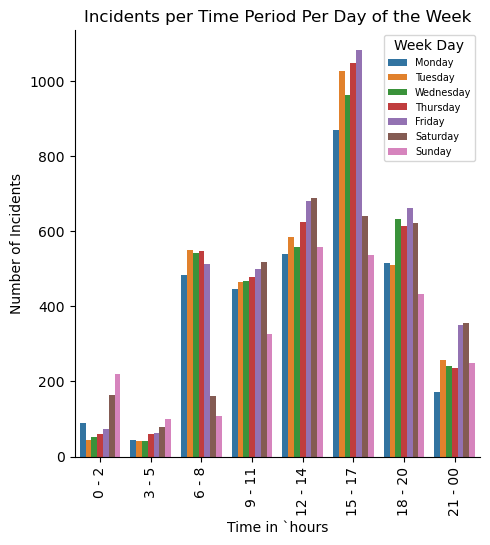

In [25]:
# Analysing which day of the week and time there were more incidents

time_period=sns.catplot(df_new[(df_new.speed_limit==30)],x = 'time_period',kind = 'count', hue= 'Week_day',
            order=['0 - 2','3 - 5','6 - 8','9 - 11','12 - 14','15 - 17','18 - 20','21 - 00'],legend=False
           )
plt.xlabel('Time in `hours')
plt.ylabel('Number of Incidents')
plt.title('Incidents per Time Period Per Day of the Week')
plt.legend(title = 'Week Day',loc='upper right',fontsize='7')
plt.xticks(rotation = 90)
plt.show(time_period)


### Observation
It appears incidences are lower in the early hours of morning and peak between 3pm and 6pm. Also,there seems to be more incidences during weekdays than weekends during the day. In addition, incidents appear to increase as the week progresses.

## Traffic Incidents Severity
Given the volume of the incidents observed under the period of study, the author wishes to understand the 
severity of the incidents. The section below shows the procedure followed.

In [27]:
# Function Data Labellling
def severity_naming(a):
    incidence = ''
    if (a==1):
        incidence = 'Fatal'
    elif(a==2):
        incidence ='Serious'
    elif(a==3):
        incidence='Slight'
    else:incidence = ""
        
    return incidence

severity_naming(4)

''

In [28]:
df_new['severity_worded']=df_new['legacy_collision_severity'].apply(severity_naming)

In [29]:
df_new['legacy_collision_severity'].unique()

array([3, 2, 1])

<Axes: title={'center': 'Incident Severity for 30mph Roads'}>

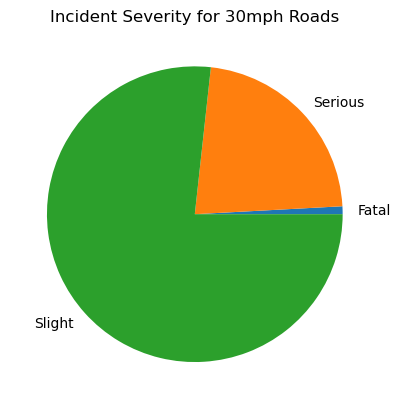

In [30]:
# Ploting data to understand the ratios of incident severity
df_new[(df_new.speed_limit == 30)].groupby('severity_worded').size().plot(kind ='pie',title = 'Incident Severity for 30mph Roads')

### Obsevation
More than 70% of the incidents are classified as slight. This is in conformity to the laws of Physics where Force at impact is lower due to relatively low change in speed.

## The Effect of Light, weather and Road Conditions 
Even though most incidents in 30mph roads are classified as slight, we wish to understand what the causes are.
To help with this, we analyse to what extent the incidents may be as a result of conditions such as weather and 
light.


In [31]:
# Function to Label Light Conditions
def light_naming(a):
    light = ''
    if (a==1):
        light = 'Daylight'
    elif(a==4):
        light ='Darkness: Street light present and lit'
    elif(a==5):
        light='Darkness: Street light present but unlit'
        
    elif(a==6):
        light='Darkness: No street lighting'
    elif(a==7):
        light='Darkness: street lighting unknown'
    else:light = ""
        
    return light

#light_naming(4)

'Darkness: Street light present and lit'

In [32]:
df_new['light_naming'] = df_new['light_conditions'].apply(light_naming)

In [33]:
df_new[(df_new.speed_limit  == 30)].groupby('light_naming').size()

light_naming
Darkness: No street lighting                  290
Darkness: Street light present and lit       5325
Darkness: Street light present but unlit      153
Darkness: street lighting unknown             404
Daylight                                    17295
dtype: int64

In [34]:
# Function for Weather Labelling
def weather_naming(a):
    
    weather = ''
    if (a==1):
        weather = 'Fine w/out high winds'
    elif(a==2):
        weather ='Raining w/out high winds'
    elif(a==3):
        weather='Snowing w/out high winds'
    elif(a==4):
        weather='Fine with high winds'
    elif(a==5):
        weather='Raining with high winds'
    elif(a==6):
        weather='Snowing with high winds'
    elif(a==7):
        weather='Fog or mist - if hazard'
        
    elif(a==8):
        weather='Other'
    elif(a==9):
        weather='Unknown'
    else:weather = ""
        
    return weather

#weather_naming(4)
    

'Fine with high winds'

/Users/namusale/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


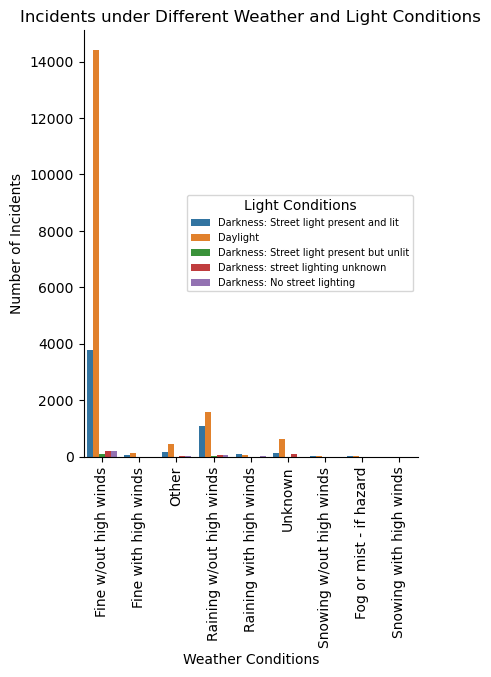

In [35]:
# Plot to understand the extent to which light and weather conditions cause road incidents
df_new['weather_naming'] = df_new['weather_conditions'].apply(weather_naming)


weather_plot = sns.catplot(df_new[(df_new.speed_limit  == 30)],x= 'weather_naming', kind= 'count',legend=False,hue= 'light_naming')
plt.xlabel('Weather Conditions')
plt.ylabel('Number of Incidents')
plt.xticks(rotation = 90)
plt.title('Incidents under Different Weather and Light Conditions')
plt.legend(title = 'Light Conditions',loc='center right',fontsize='7')
plt.show(weather_plot)

### Observation 
It seems that most incidents occurred in good weather and good light conditions. This is  not to imply that bad
conditions do not affect road safety. It may that the weather was generally dry (January to June). Noted are 
incidences on rainy times,even though they  are not as many as on fine weather days. 

## Road Surface Conditions and Road Types
With incidents being more prevailent in good weather conditions,we work to analyse if road surface conditions
and type of road have a role in the numbers of road incidents. The below section work to analyse as such.

In [36]:
# Checking road surface conditions data
df_new[(df_new.speed_limit  == 30)].groupby('road_surface_conditions').size()

road_surface_conditions
-1      245
 1    17134
 2     5393
 3       33
 4      254
 5       16
 9      392
dtype: int64

In [37]:
#Small data cleaning step for invalid entries
df_new[('road_surface_conditions')].replace(-1,9,inplace = True)


In [38]:
df_new['road_surface_conditions'].unique()
#df_new[(df_new.speed_limit  == 30)].groupby('road_surface_conditions').size()

array([1, 2, 9, 5, 4, 3])

In [39]:
# Function for Road type Namimg
def  road_type(road_entry):
    road = ''
    if(road_entry== 1):
        road='Roundabout'
    elif(road_entry==2):
        road='One way street'
    elif(road_entry==3):
        road='Dual carriageway' 
    elif(road_entry==6):
        road='Single carriageway'
    elif(road_entry==7):
        road='Slip Road'
    elif(road_entry==9):
        road='Unknown'
    else:
        road=""
    return road

#road_type(1)

'Roundabout'

In [40]:
df_new['road_type_name']=df_new['road_type'].apply(road_type)

In [41]:
# Function for road surface Conditions
def road_surface(road_entry):
    road_condition=''
    
    if(road_entry== 1):
        road_condition='Dry'
        
    elif(road_entry==2):
        road_condition='Wet/Damp'
        
    elif(road_entry==3):
        road_condition='Snow' 
        
    elif(road_entry==4):
        road_condition='Frost/Ice'
        
    elif(road_entry==5):
        road_condition='Flood'
        
    else:
        road_condition=""
        
    return road_condition
    
    
road_surface(2)    

'Wet/Damp'

In [42]:
df_new['road_surface_conditions_worded']=df_new['road_surface_conditions'].apply(road_surface)

/Users/namusale/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


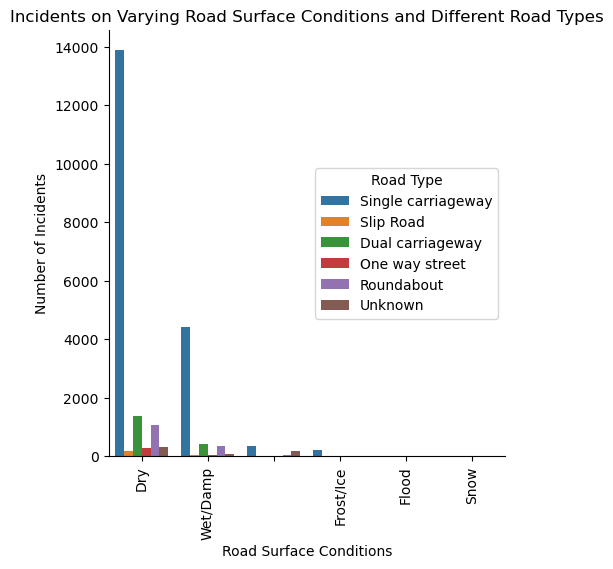

In [43]:

road_surface=sns.catplot(df_new[df_new.speed_limit == 30],x='road_surface_conditions_worded',kind='count',
                         hue = 'road_type_name',legend=False)

plt.xlabel('Road Surface Conditions')
plt.ylabel('Number of Incidents')
plt.xticks(rotation = 90)
plt.title('Incidents on Varying Road Surface Conditions and Different Road Types')
plt.legend(title = 'Road Type',loc='center right',fontsize='10')
plt.show(road_surface)

### Observation
Most incidents happen on dry road surfaces.When roads are wet and damp,noted a considerable volume of incidents too.These incidents are more prevailent on single carriageway roads

## Where Are Incidents Frequent?
Given that it has been noted that incidents mostly occured in 30mph in fine weather conditions. Of interest is to
know whether there are hotspots or not. We analyse data for juction details.

In [45]:
#df.groupby(['legacy_collision_severity','speed_limit']).count()

In [46]:
# Junction naming function
def junction_detail(junction):
    junction_type =""
    
    if (junction==-1):
        junction_type = 'Unknown'
        
    elif(junction==0):
        junction_type ='Not at or within 20m of junction'
        
    elif(junction==1):
        junction_type='Roundabout'
        
    elif(junction==2):
        junction_type='Mini roundabout'
        
    elif(junction==3):
        junction_type='T or staggered junction'
        
    elif(junction==5):
        junction_type='Slip road'
        
    elif(junction==6):
        junction_type='Crossroads'
        
    elif(junction==7):
        junction_type='Junction more than 4 arms'
        
    elif(junction==8):
        junction_type='Using private drive or entrance'
        
    elif(junction==9):
        junction_type='Other junction'
        
    elif(junction==99):
        junction_type='Unknown'
        
    else:junction_type = ""
        
    return junction_type

#junction_detail(0)
    

'Not at or within 20m of junction'

In [47]:
# Checking junction distribution
df_new.groupby('junction_detail').size()

junction_detail
-1      1331
 0     18644
 1      2994
 2       615
 3     12718
 5       509
 6      4176
 7       761
 8       989
 9      2984
 99      986
dtype: int64

In [48]:
# Adding junction detail name feature 
df_new['junction_detail_name']=df_new['junction_detail'].apply(junction_detail)

In [49]:
df_new['junction_detail_name'].head()

0             T or staggered junction
1                          Crossroads
2    Not at or within 20m of junction
3                     Mini roundabout
4                          Roundabout
Name: junction_detail_name, dtype: object

/Users/namusale/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


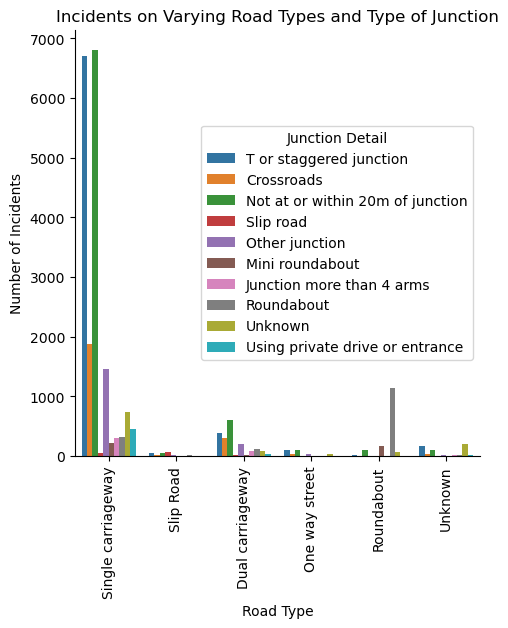

In [50]:
# Plotting incidences on junction detail per road type
junction_det=sns.catplot(df_new[df_new.speed_limit==30],x = 'road_type_name',kind = 'count', 
                         hue = 'junction_detail_name',legend=False)
plt.xlabel('Road Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation = 90)
plt.title('Incidents on Varying Road Types and Type of Junction')
plt.legend(title = 'Junction Detail',loc='center right',fontsize='10')
plt.show(junction_det)

### Observation

The majority of incidences that occurred on single carriageway were  at a junction.Equally,incidences away from a junction were notable. T or staggered junctions appear to be hot spots on single carriageway.

## Discusion
From the analysis carried out,it was observed that more 60% of incidents were on 30mph and below roads.
At these lower speeds, the severity of incidents was genarally low. With high volumes of incidents,it was
observed that they mostly occured in daylight and dry weather conditions. This is not to infer that they are
not affected by the  conditions. It could be speculated that few wet periods and longer days the period of
study constituted;2 winter months,3 spring months and 1 summer month. Another observation,was that most 
incidences occured on single carriageway and near a junction, with T and staggered junction being one of
hotspots. Worthy of mention also is high volume of the single carriageway incidents that happen away from
junction.

With this information,it can be infered that single carriageway junctions are one of the hotspots. [2] discussed
the causes of accidents at junctions,with speed misjudgement being one of them. 

This report did not go further to address the causes of accidents in single carriage way away from junction. 
It would be interesting examine more information about cars and drivers to determine if there are patterns
that cause incidents. As of this report, this aspect has not been covered but will be in future work.

# References
[1] https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-accidents-safety-data(accessed 10-05-2025)
[2]https://www.switalskis.com/blog/common-types-collision-junction(accessed:19-05-2025]